# Exercise Set 6: Data Structuring 2

*Afternoon, August 14, 2019*

In this Exercise Set we will continue working with the weather data you downloaded and saved in Exercise Set 4. 

> **_Note_**: to solve the bonus exercises in this exerise set you will need to apply the `.groupby()` method a few times. This has not yet been covered in the lectures (you will see it tomorrow).  
>
> `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

First load in the required modules and set up the plotting library:

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Exercise Section 6.1: Weather, part 2

This section is the second part of three that analyzes NOAA data. The first part is Exercise Section 4.1, the last part is Exercise Section 7.2.

> **Ex. 6.1.1:** Load the CSV data you stored yesterday as part of Exercise Section 4.1. If you didn't manage to save the CSV file, you can use the code in [this gist](https://gist.github.com/Kristianuruplarsen/be3a14b226fc4c4d7b62c39de70307e4) to load in the NOAA data.

In [32]:
# [Answer to Ex. 6.1.1]
import pandas as pd

url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]

df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_select = df_weather[(df_weather.station == 'ITE00100550') & (df_weather.obs_type == 'TMAX')].copy()
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])

In [33]:
print(df_sorted.head())

        station  datetime obs_type  obs_value  TMAX_F
16  ITE00100550  18640117     TMAX       -6.3   20.66
17  ITE00100550  18640118     TMAX       -5.0   23.00
13  ITE00100550  18640114     TMAX       -5.0   23.00
12  ITE00100550  18640113     TMAX       -4.3   24.26
14  ITE00100550  18640115     TMAX       -3.1   26.42


> **Ex. 6.1.2:** Convert the date formatted as string to  datetime. Make a new column with the month for each observation.

In [34]:
print(df_sorted['datetime'].head())

16    18640117
17    18640118
13    18640114
12    18640113
14    18640115
Name: datetime, dtype: int64


In [35]:
# [Answer to Ex. 6.1.2]

df_sorted['datetime'] = pd.to_datetime(df_sorted['datetime'], format='%Y%m%d')

#df_sorted['datetime'] = pd.to_datetime(df_sorted['datetime'], infer_datetime_format=True)

print(df_sorted['datetime'].head())

16   1864-01-17
17   1864-01-18
13   1864-01-14
12   1864-01-13
14   1864-01-15
Name: datetime, dtype: datetime64[ns]


In [39]:
from datetime import datetime

def get_month(d: datetime) -> int:
    return d.month

df_sorted['month'] = df_sorted['datetime'].apply(get_month)

print(df_sorted.head())

        station   datetime obs_type  obs_value  TMAX_F  month
16  ITE00100550 1864-01-17     TMAX       -6.3   20.66      1
17  ITE00100550 1864-01-18     TMAX       -5.0   23.00      1
13  ITE00100550 1864-01-14     TMAX       -5.0   23.00      1
12  ITE00100550 1864-01-13     TMAX       -4.3   24.26      1
14  ITE00100550 1864-01-15     TMAX       -3.1   26.42      1


In [44]:
print(df_sorted.head())

        station   datetime obs_type  obs_value  TMAX_F  month
16  ITE00100550 1864-01-17     TMAX       -6.3   20.66      1
17  ITE00100550 1864-01-18     TMAX       -5.0   23.00      1
13  ITE00100550 1864-01-14     TMAX       -5.0   23.00      1
12  ITE00100550 1864-01-13     TMAX       -4.3   24.26      1
14  ITE00100550 1864-01-15     TMAX       -3.1   26.42      1


> **Ex. 6.1.3:** Set the datetime variable as temporal index and make a timeseries plot.

> _Hint:_ for this you need to know a few methods of the pandas DataFrames and pandas Series objects. Look up `.set_index()` and `.plot()`. 

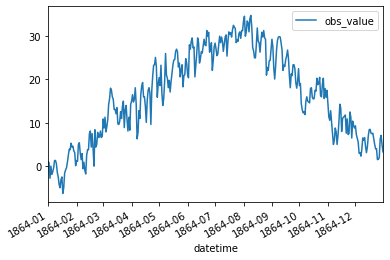

In [47]:
# [Answer to Ex. 6.1.3]
#df_sorted['datetime'] = pd.DatetimeIndex(df_sorted['datetime'])
df_sorted.set_index('datetime')
#print(df_sorted['datetime'].head())

df_sorted.plot(x='datetime', y='obs_value')

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.

> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module. 

In [50]:
# [Answer to Ex. 6.1.4]
import re

country_code_matcher = re.compile('^[A-Z]{2,3}')

def get_country_code(station_id: str) -> str:
    return country_code_matcher.match(station_id).group()
    
df_sorted['country_code'] = df_sorted['station'].apply(get_country_code)

print(df_sorted.head())

        station   datetime obs_type  obs_value  TMAX_F  month country_code
16  ITE00100550 1864-01-17     TMAX       -6.3   20.66      1          ITE
17  ITE00100550 1864-01-18     TMAX       -5.0   23.00      1          ITE
13  ITE00100550 1864-01-14     TMAX       -5.0   23.00      1          ITE
12  ITE00100550 1864-01-13     TMAX       -4.3   24.26      1          ITE
14  ITE00100550 1864-01-15     TMAX       -3.1   26.42      1          ITE


> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

In [4]:
# [Answer to Ex. 6.1.5]

def get_weather_data(year):
    base_url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{}.csv.gz'
    df_weather = pd.read_csv(base_url.format(str(year)),
                            compression='gzip',
                            header=None).iloc[:, :4] # Truncate rows to only the first 4 columns
    # name the columns
    df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    # Wrangle tempeture, it comes in tenth of degrees
    df_weather['obs_value'] = df_weather['obs_value'] / 10
    # Choose only the observation type TMAX
    df_select_tmax = df_weather[(df_weather.obs_type == 'TMAX')].copy()
    
    df_select_tmax['tmax_f'] = 32 + 1.8 * df_select_tmax['obs_value']
    df_sorted = df_select_tmax.reset_index(drop=True).sort_values(by=['obs_value'])
    return df_sorted


test_1864_df = get_weather_data(1864)
test_1864_df.head()

,station,datetime,obs_type,obs_value,tmax_f
845,SZ000006717,18640226,TMAX,-34.0,-29.20
577,SZ000006717,18640208,TMAX,-17.4,0.68
699,CA006158350,18640217,TMAX,-16.7,1.94
42,SZ000006717,18640103,TMAX,-16.5,2.30
16,CA006158350,18640102,TMAX,-16.1,3.02


##  Exercise Section 6.2: 

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. 


> **Ex. 6.2.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.

> _Hint #1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 

> _Hint #2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [ ]:
# [Answer to Ex. 6.2.1]

> **Ex. 6.2.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the  `dropna` method. How many rows are removed in this operation?

> _Hint 1:_ if this doesn't work as expected you might want to take a look at the hint for 6.2.1 again.
 
> _Hint 2:_ The NaN method from NumPy might be useful

In [ ]:
# [Answer to Ex. 6.2.2]

> **Ex. 6.2.3:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [ ]:
# [Answer to Ex. 6.2.3]

> **Ex. 6.2.4:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ the `.query()` method is extremely useful for filtering data.

In [ ]:
# [Answer to Ex. 6.2.4]